# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>

Today we will become Dr Semmelweis. We will step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [3]:
df_yearly = pd.read_csv('D:\python udemy\data science/all projects\Dr Semmelweis Analysis/annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('D:\python udemy\data science/all projects\Dr Semmelweis Analysis/monthly_deaths.csv', parse_dates=['date'])

# Preliminary Data Exploration

In [4]:
df_yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [5]:
df_monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [6]:
print(f"Shape df_yearly: {df_yearly.shape}\nShape df_monthly: {df_monthly.shape}")

Shape df_yearly: (12, 4)
Shape df_monthly: (98, 3)


In [7]:
print(f"Colomns df_yearly: {df_yearly.columns.values}\nColomns df_monthly: {df_monthly.columns.values}")

Colomns df_yearly: ['year' 'births' 'deaths' 'clinic']
Colomns df_monthly: ['date' 'births' 'deaths']


### Check for Nan Values and Duplicates

In [8]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [9]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


**Insight:** there are no NaN values or Duplicates in either of the datasets. Thus, the datasets are already cleaned so we can move on the analysis phase.

### Descriptive Statistics

In [10]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [11]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


**Insight:** a quick glance at the table, we can see that on average there are 267 births and 22.47 monthly.

### Percentage of Women Dying in Childbirth

In [12]:
prob = (df_yearly.deaths.sum()/df_yearly.births.sum())*100
print(f"During the 1840s in Vienna, the women death rate is {prob:.2f} %.")

During the 1840s in Vienna, the women death rate is 7.08 %.


**Insight:** The general mortality rate of women in childbirth during the 1840s was a staggering 7.08%, a significant contrast to the 2013 United States statistics of only 0.018%. This implies that for every 100 women giving birth, 7 faced mortality each year.

# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes



In [13]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

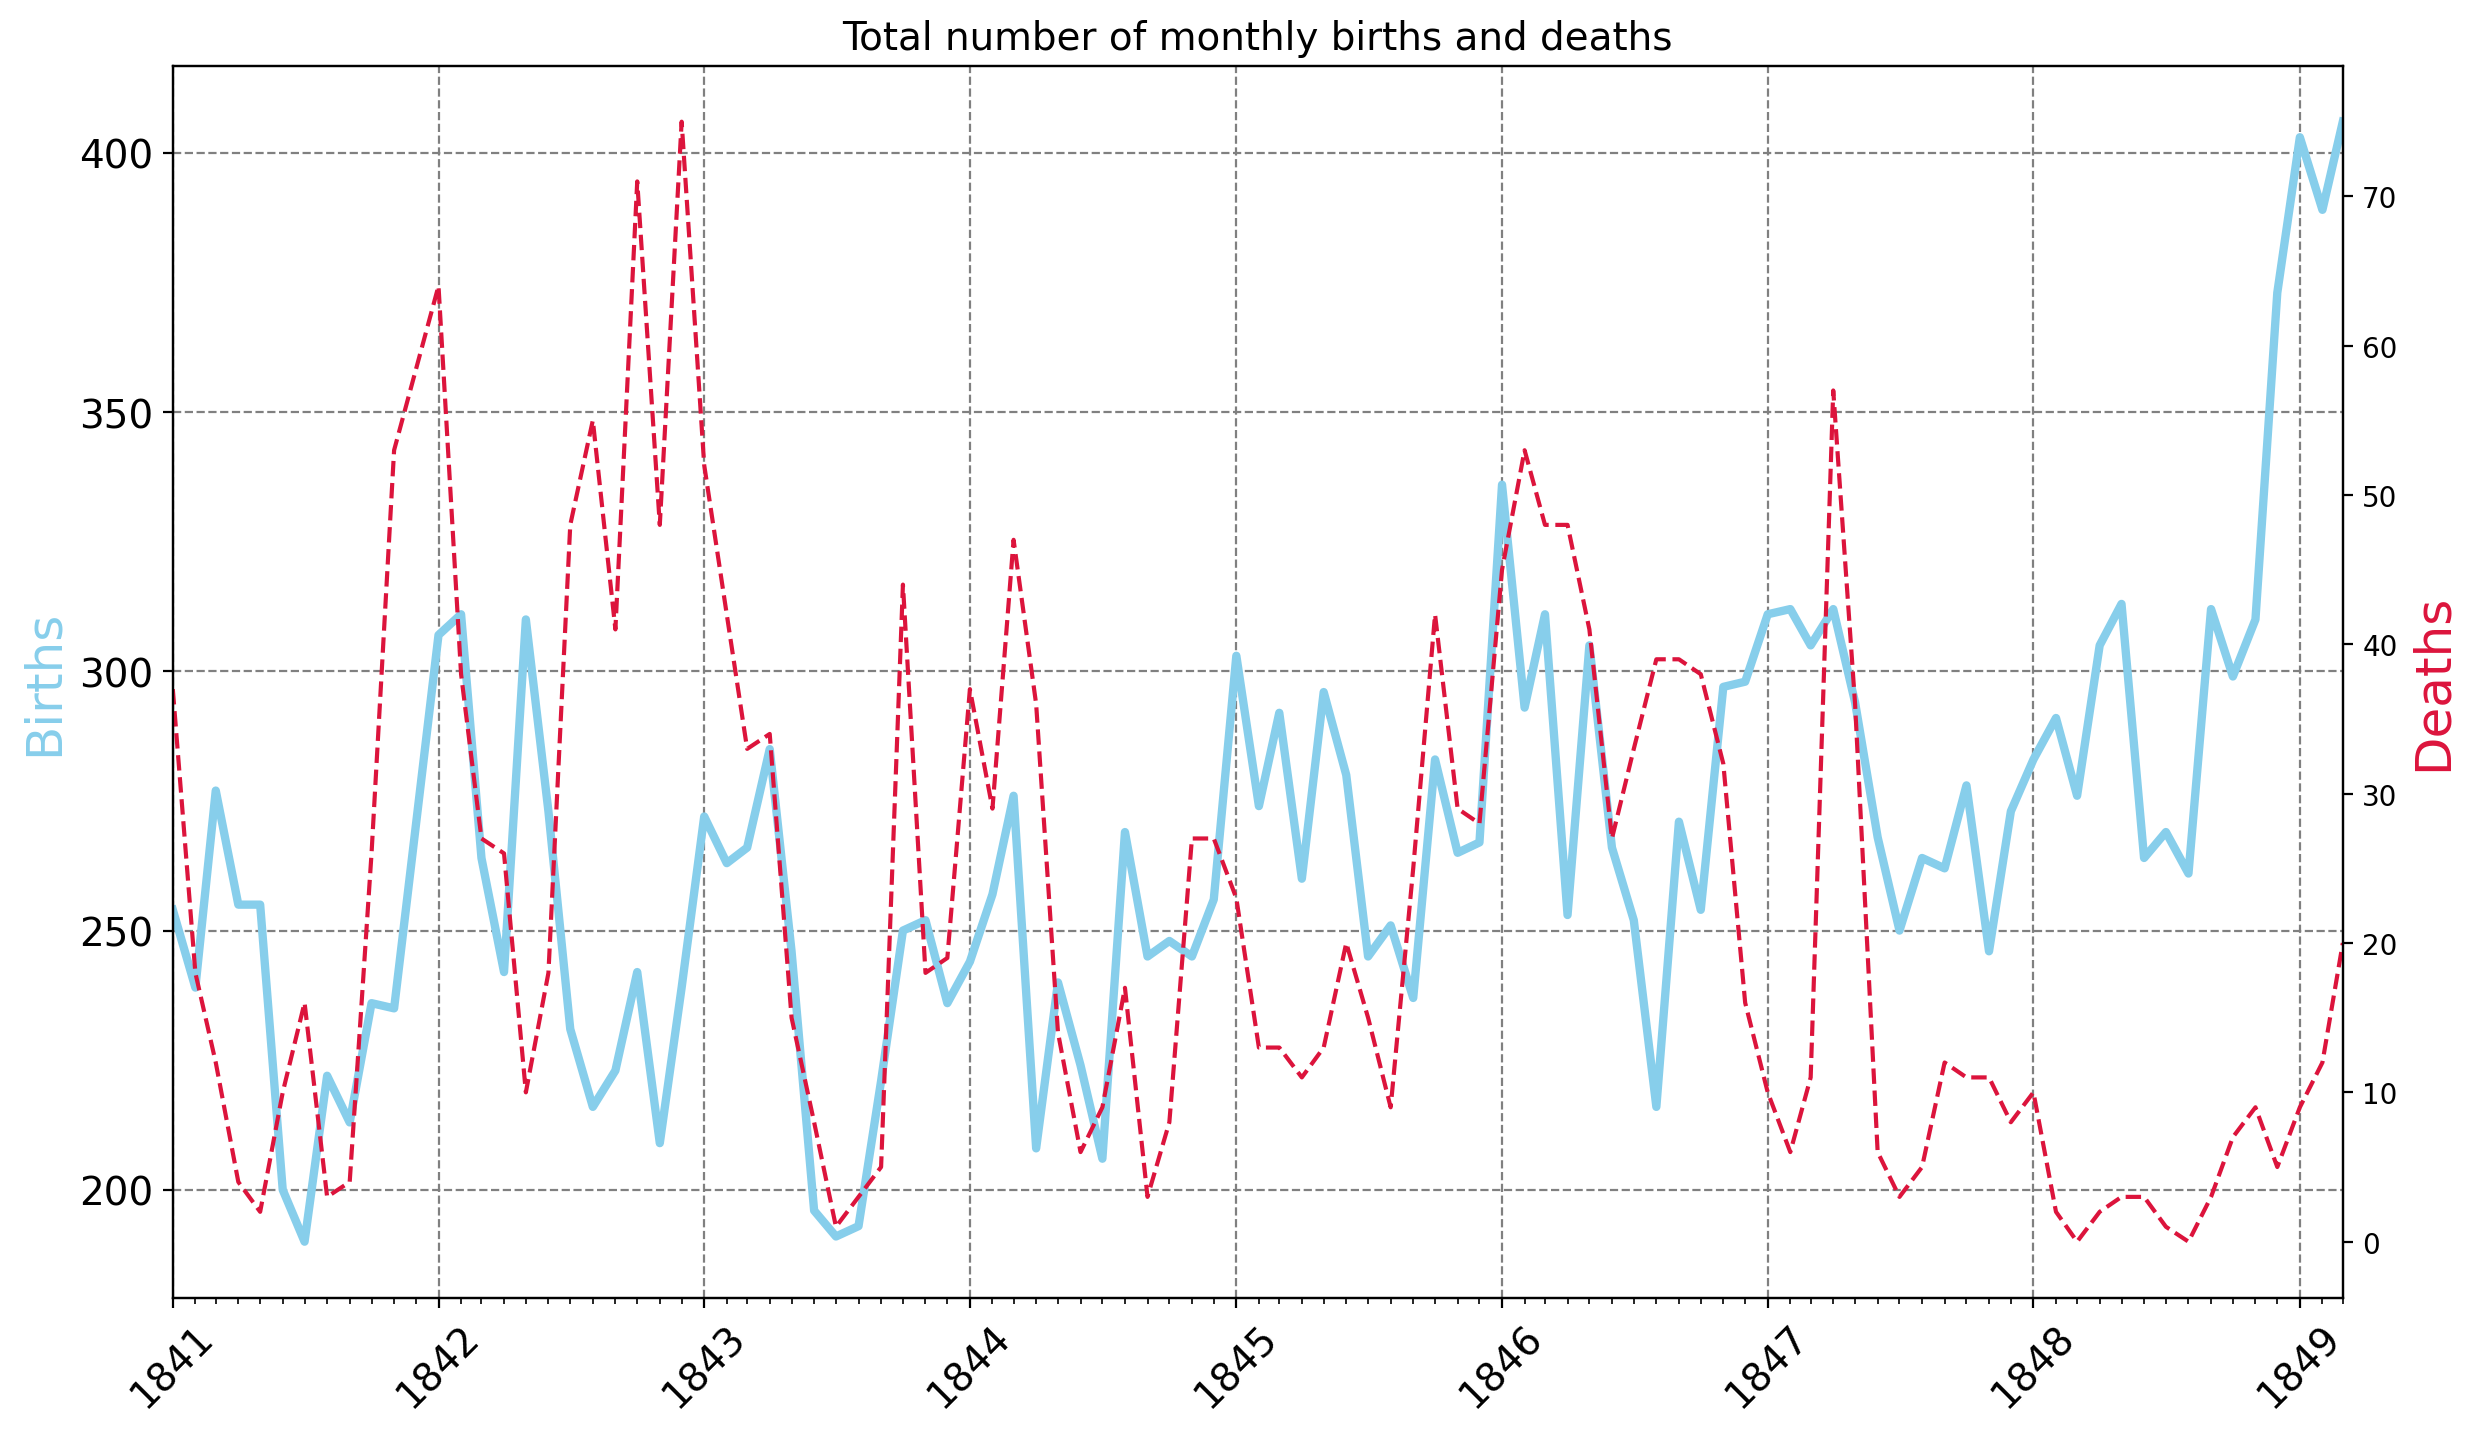

In [14]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total number of monthly births and deaths', fontsize = 14)
plt.yticks(fontsize =14)
plt.xticks(fontsize = 14, rotation = 45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Births', color = 'skyblue', fontsize = 18)
ax2.set_ylabel('Deaths', color = 'crimson', fontsize = 18)

# Use locators
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color = 'grey', linestyle= '--')

ax1.plot(
    df_monthly.date,
    df_monthly.births,
    color = 'skyblue',
    linewidth = 3
)

ax2.plot(
    df_monthly.date,
    df_monthly.deaths,
    color = 'crimson',
    linestyle = '--'
)

plt.show()

**Insight:** What stands out here is that from 1841 to 1847, the death rate appears to be relatively high compared to the birth rate. However, after 1847, there is a significant drop in the death rate, indicating that something might have occurred to cause this decline.

# The Yearly Data Split by Clinic

In [15]:
df_yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


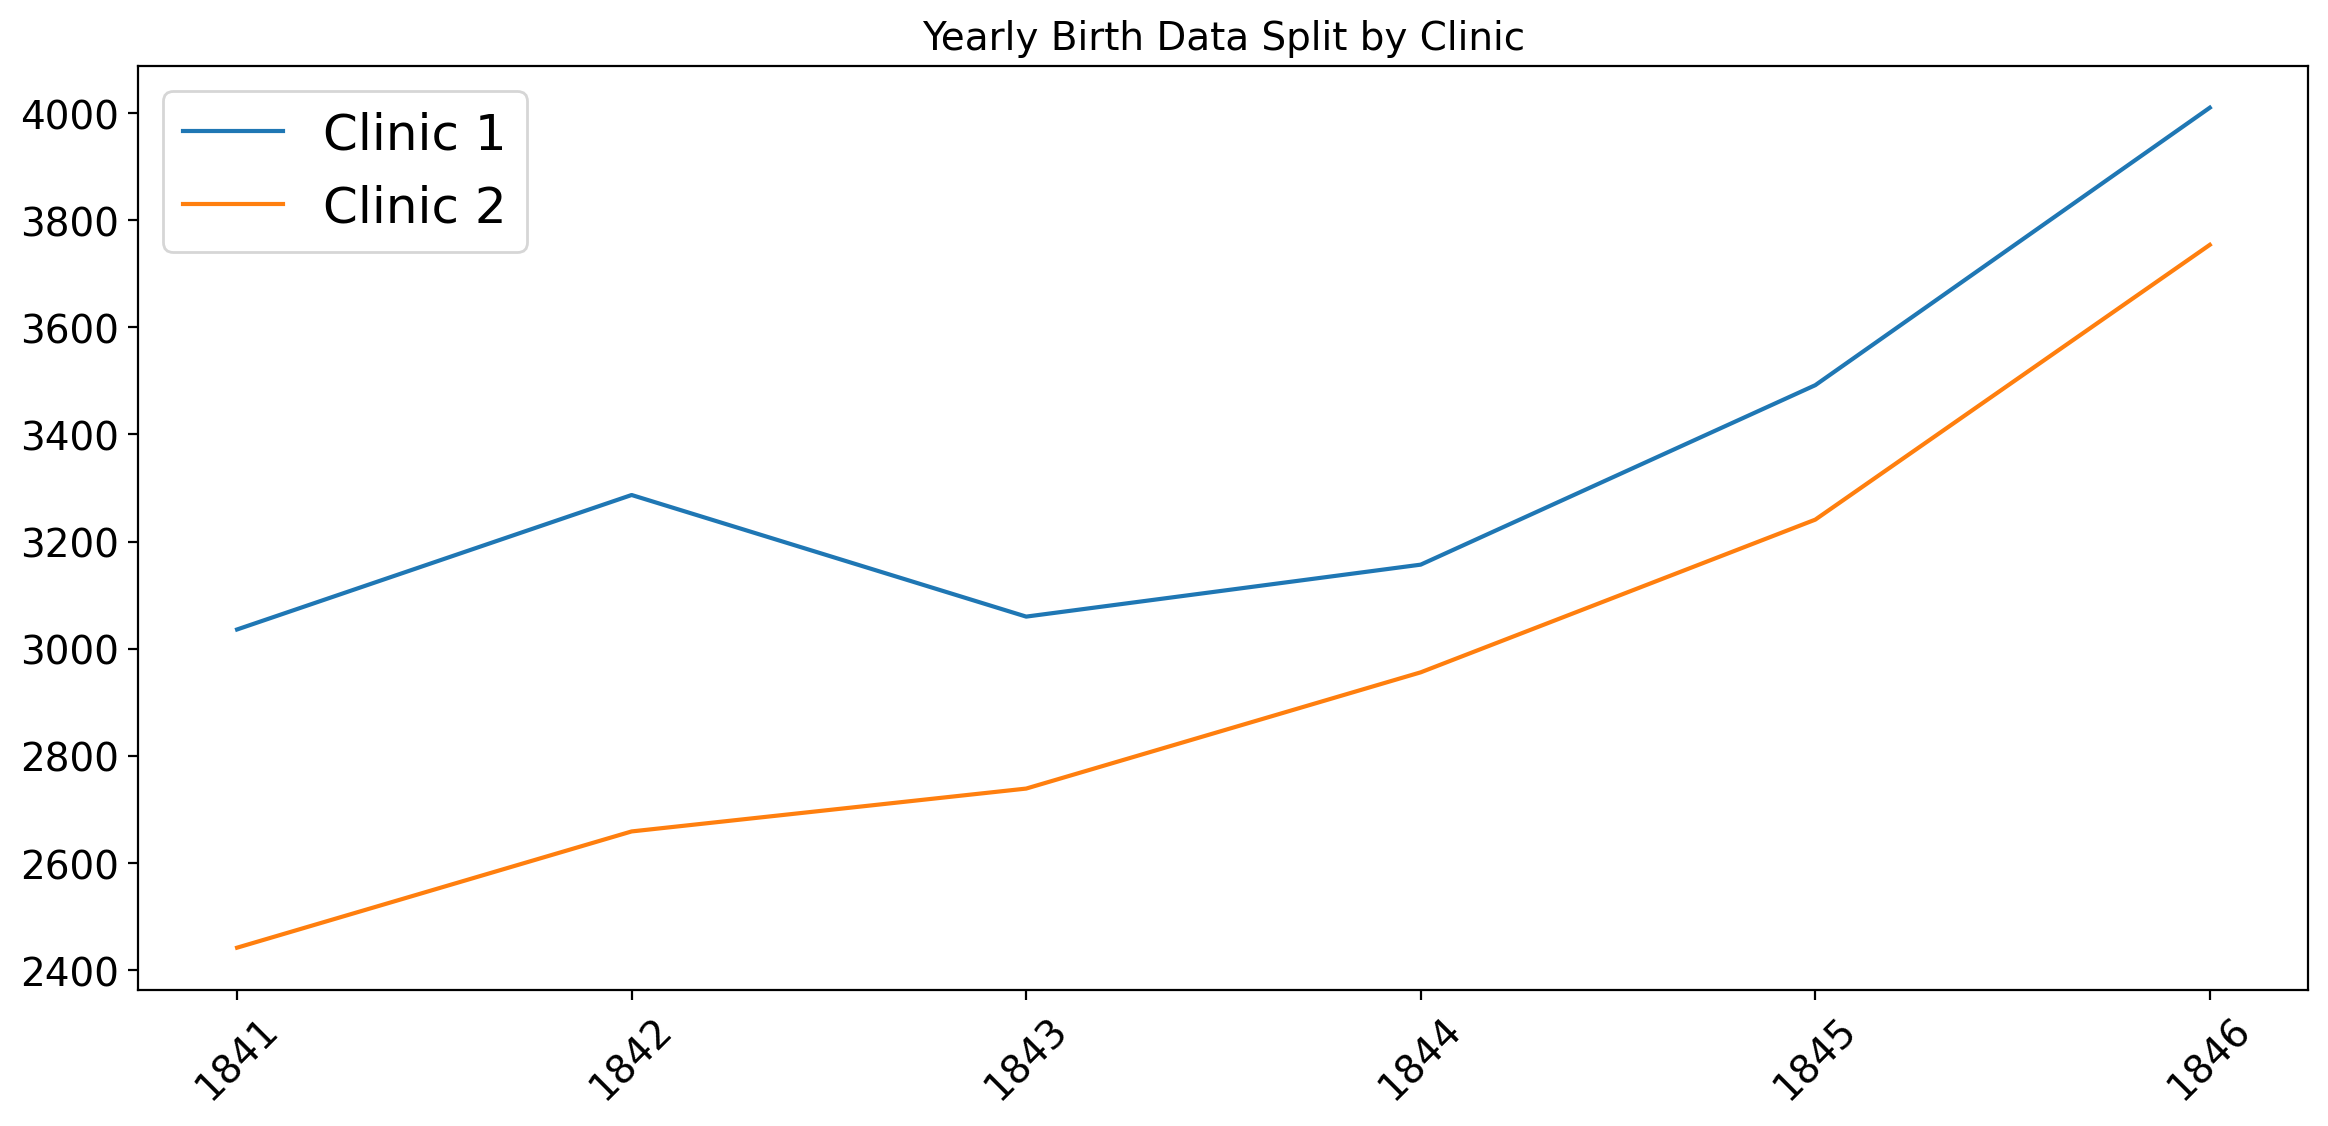

In [16]:
plt.figure(figsize=(14,6), dpi=200)
plt.title('Yearly Birth Data Split by Clinic', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14, rotation = 45)

clinic_1, = plt.plot(
    df_yearly[df_yearly.clinic == "clinic 1"].year,
    df_yearly[df_yearly.clinic == "clinic 1"].births,
    label = "Clinic 1"
)

clinic_2, = plt.plot(
    df_yearly[df_yearly.clinic == "clinic 2"].year,
    df_yearly[df_yearly.clinic == "clinic 2"].births,
    label = "Clinic 2"
)

plt.legend(handles = [clinic_1, clinic_2], fontsize = 18)

plt.show()

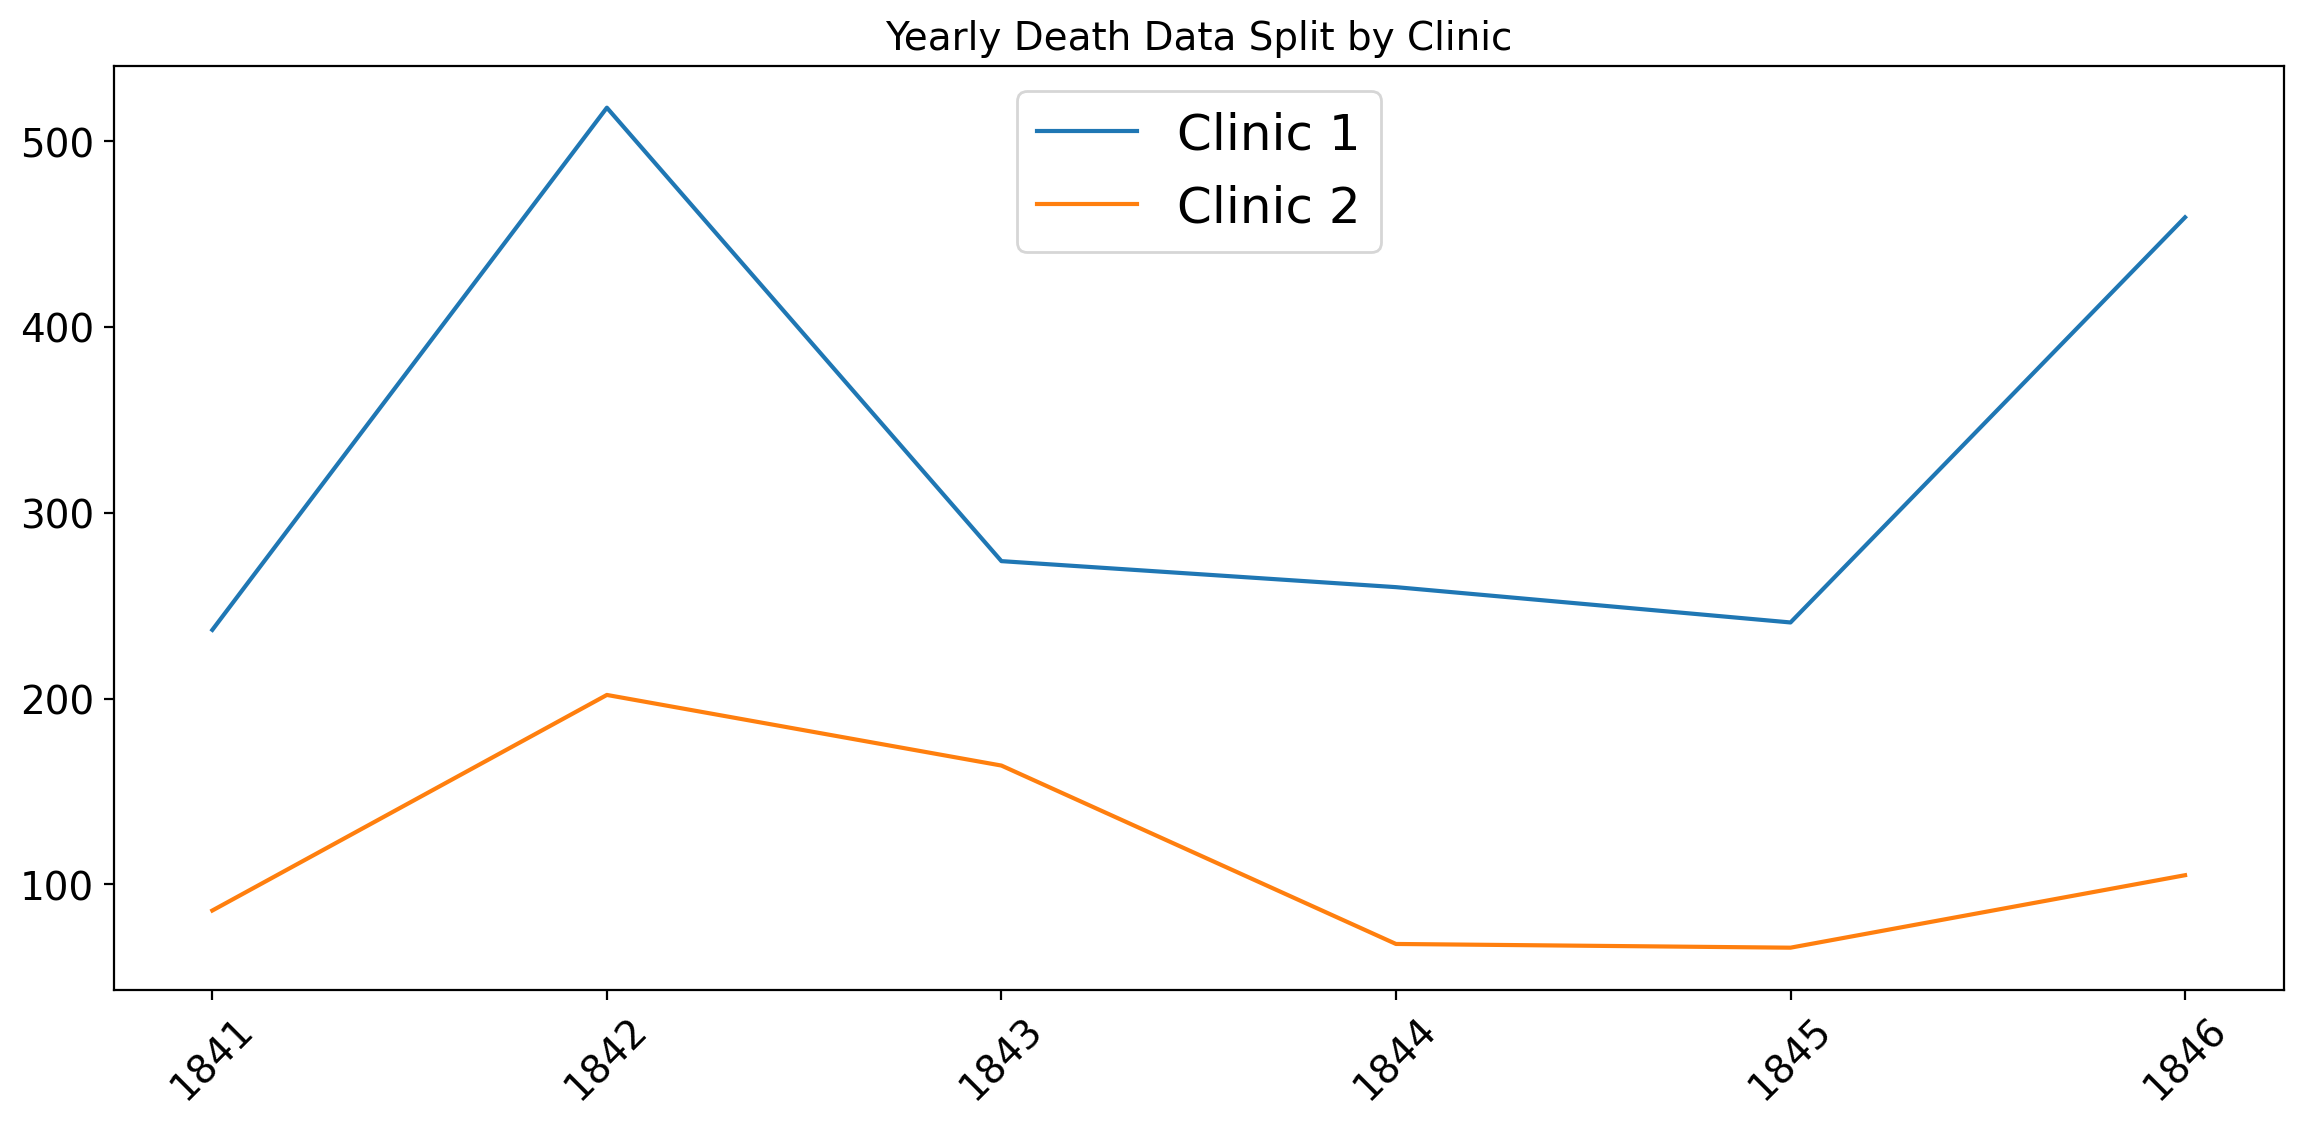

In [17]:
plt.figure(figsize=(14,6), dpi=200)
plt.title('Yearly Death Data Split by Clinic', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14, rotation = 45)

clinic_1, = plt.plot(
    df_yearly[df_yearly.clinic == "clinic 1"].year,
    df_yearly[df_yearly.clinic == "clinic 1"].deaths,
    label = "Clinic 1"
)

clinic_2, = plt.plot(
    df_yearly[df_yearly.clinic == "clinic 2"].year,
    df_yearly[df_yearly.clinic == "clinic 2"].deaths,
    label = "Clinic 2"
)

plt.legend(handles = [clinic_1, clinic_2], fontsize = 18)

plt.show()

**Insight:** According to the initial graph, it is evident that an increasing number of women are giving birth to children. Additionally, Clinic 1 appears to be the busier of the two. Furthermore, as indicated by the second graph, Clinic 1 not only has higher activity but also records more deaths than Clinic 2.

### Calculate the Proportion of Deaths at Each Clinic

Calculate the proportion of maternal deaths per clinic. That way we can compare like with like.
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths".
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [18]:
df_yearly['pct_deaths'] = df_yearly.deaths/df_yearly.births
df_yearly

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,0.08
1,1842,3287,518,clinic 1,0.16
2,1843,3060,274,clinic 1,0.09
3,1844,3157,260,clinic 1,0.08
4,1845,3492,241,clinic 1,0.07
5,1846,4010,459,clinic 1,0.11
6,1841,2442,86,clinic 2,0.04
7,1842,2659,202,clinic 2,0.08
8,1843,2739,164,clinic 2,0.06
9,1844,2956,68,clinic 2,0.02


In [19]:
death_by_clinics = df_yearly.groupby('clinic').agg({'pct_deaths': pd.Series.mean})
death_by_clinics

,pct_deaths
clinic,
clinic 1,0.10
clinic 2,0.04


**Insight:** According to this table, it is observed that Clinic 1 is more than twice as likely to encounter deaths compared to Clinic 2. Why is this the case? Once again, let's plot it on a chart

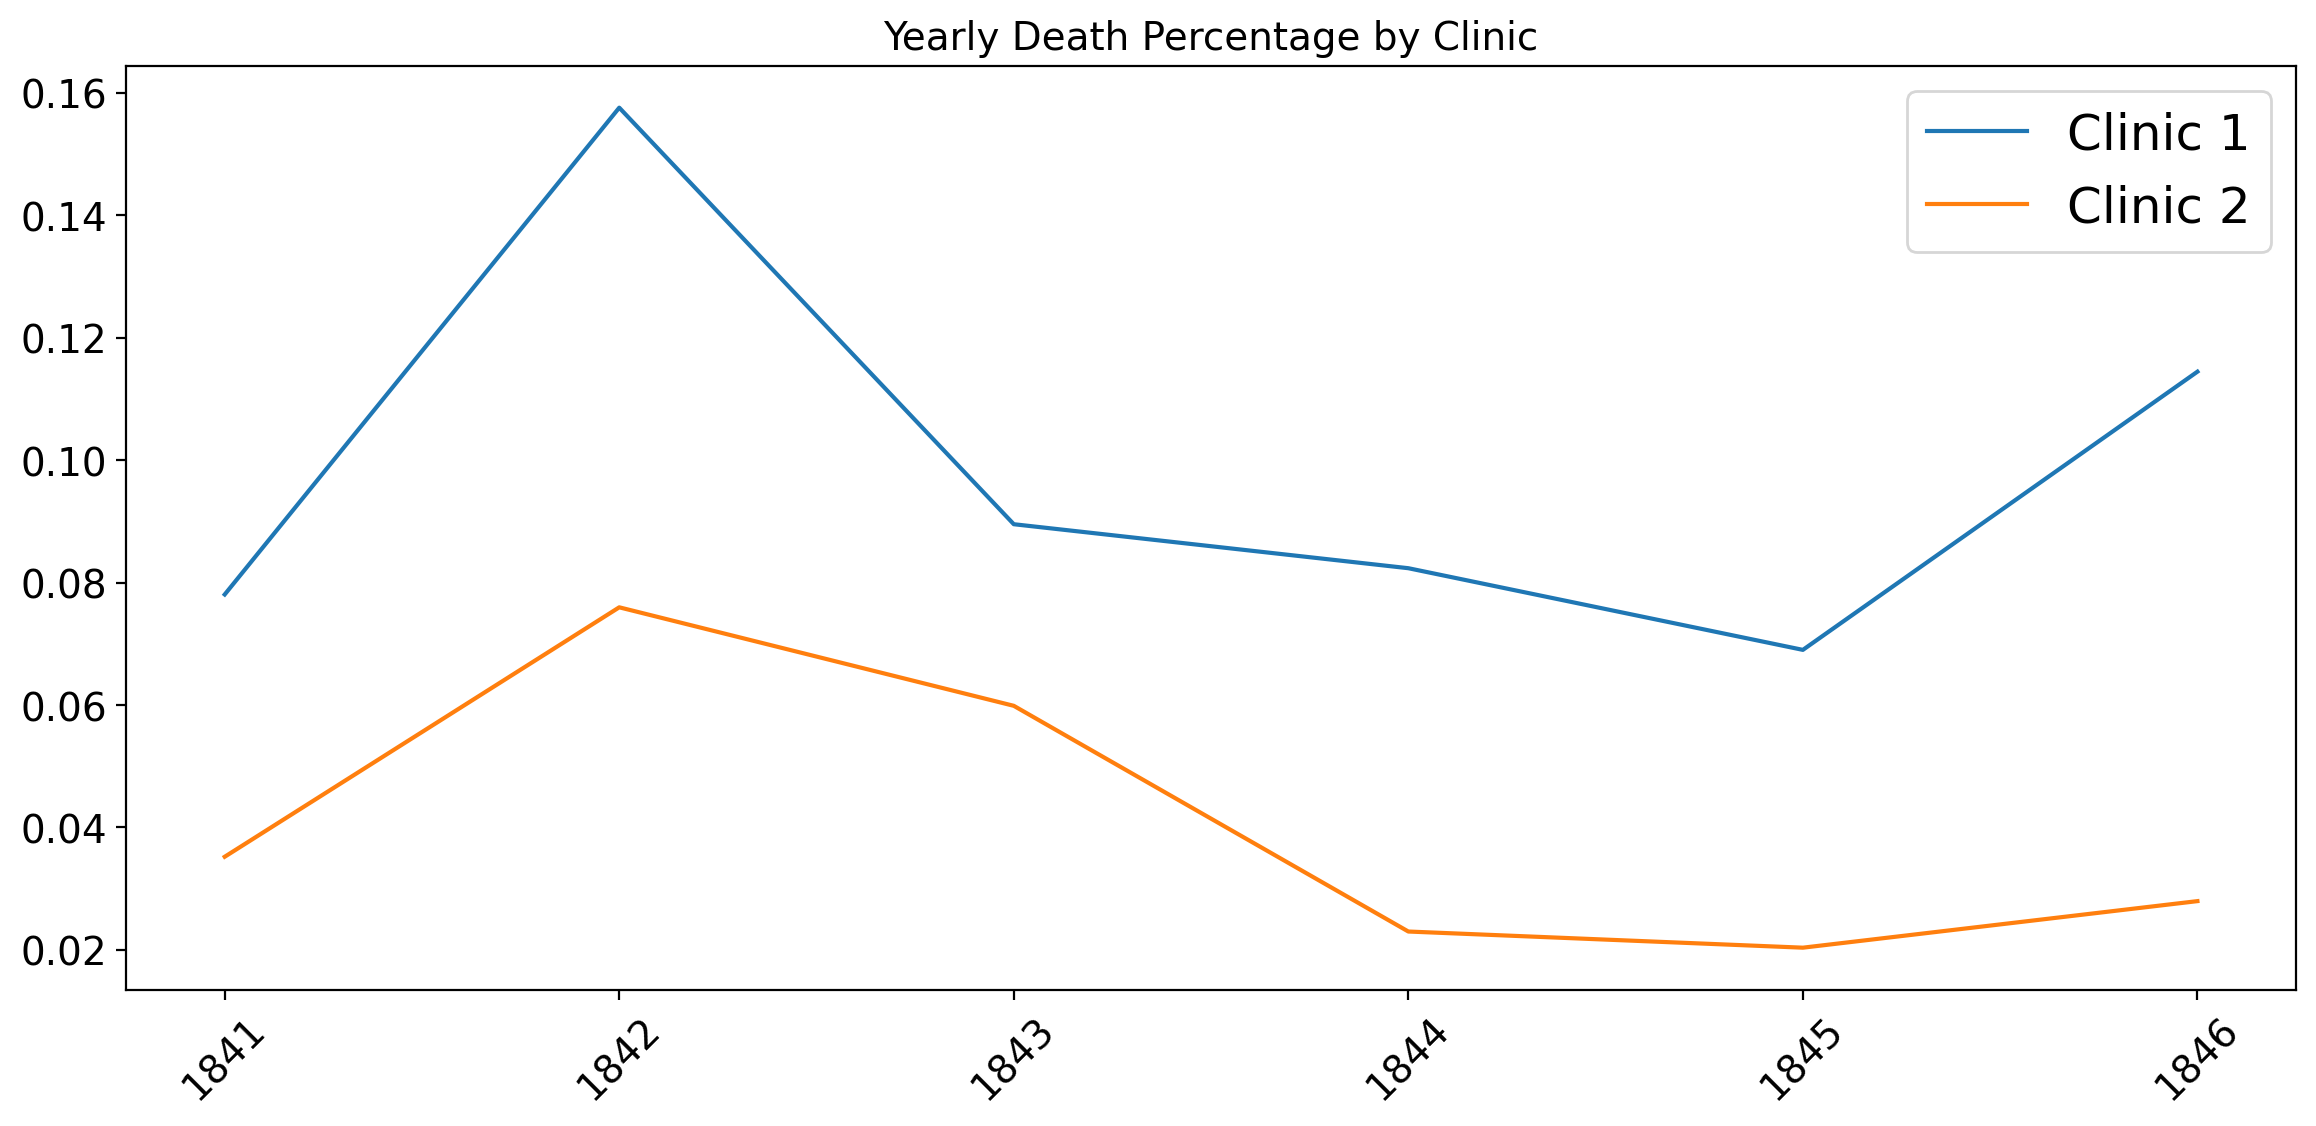

In [20]:
plt.figure(figsize=(14,6), dpi=200)
plt.title('Yearly Death Percentage by Clinic', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14, rotation = 45)

clinic_1, = plt.plot(
    df_yearly[df_yearly.clinic == "clinic 1"].year,
    df_yearly[df_yearly.clinic == "clinic 1"].pct_deaths,
    label = "Clinic 1"
)

clinic_2, = plt.plot(
    df_yearly[df_yearly.clinic == "clinic 2"].year,
    df_yearly[df_yearly.clinic == "clinic 2"].pct_deaths,
    label = "Clinic 2"
)

plt.legend(handles = [clinic_1, clinic_2], fontsize = 18)

plt.show()

**Insight:** It is evident that in 1842, the death rate was at its peak, with Clinic 1 recording a total death rate of over 15% and Clinic 2 at 7.5%. Further research on the internet suggests that during the 1840s, doctors and medical students were not as hygienic during autopsies, allowing diseases from the remains and particles of the corpse to transfer to women giving birth. This breakthrough allow Semmelweis to realised that the majority of the deaths in both clinics were not only cause by women giving birth but also transmitted disease.

After the discovery, in June 1846, Dr. Semmelweis mandated that every member of his medical staff begin cleaning their hands and instruments not only with soap and water but also with a chlorine solution after an autopsy.

# The Effect of Handwashing



In [21]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')
handwashing_start

Timestamp('1847-06-01 00:00:00')

* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row.

In [22]:
df_monthly['pct_death'] = df_monthly['deaths']/df_monthly['births']

* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.

In [23]:
df_before_hw = df_monthly[df_monthly.date < handwashing_start]
df_before_hw

,date,births,deaths,pct_death
0,1841-01-01,254,37,0.15
1,1841-02-01,239,18,0.08
2,1841-03-01,277,12,0.04
3,1841-04-01,255,4,0.02
4,1841-05-01,255,2,0.01
...,...,...,...,...
71,1847-01-01,311,10,0.03
72,1847-02-01,312,6,0.02
73,1847-03-01,305,11,0.04
74,1847-04-01,312,57,0.18


In [24]:
df_after_hw = df_monthly[df_monthly.date >= handwashing_start]
df_after_hw

,date,births,deaths,pct_death
76,1847-06-01,268,6,0.02
77,1847-07-01,250,3,0.01
78,1847-08-01,264,5,0.02
79,1847-09-01,262,12,0.05
80,1847-10-01,278,11,0.04
81,1847-11-01,246,11,0.04
82,1847-12-01,273,8,0.03
83,1848-01-01,283,10,0.04
84,1848-02-01,291,2,0.01
85,1848-03-01,276,0,0.00


* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [25]:
before_hw_rate = (df_before_hw.deaths.sum()/df_before_hw.births.sum())*100
after_hw_rate = (df_after_hw.deaths.sum()/df_after_hw.births.sum())*100
print(f"Before the handwashing madatory the death rate was {before_hw_rate:.4}%.")
print(f"After the handwashing madatory the death rate was {after_hw_rate:.3}%.")

Before the handwashing madatory the death rate was 10.53%.
After the handwashing madatory the death rate was 2.15%.


**Insight**: Wow, the handwashing madatory worked. The mortality rate dropped by roughly a factor of 5 from 10.53% to 2.15%.

### Calculate a Rolling Average of the Death Rate

In [26]:
rolling_df = df_before_hw.set_index('date')
rolling_df

,births,deaths,pct_death
date,,,
1841-01-01,254,37,0.15
1841-02-01,239,18,0.08
1841-03-01,277,12,0.04
1841-04-01,255,4,0.02
1841-05-01,255,2,0.01
...,...,...,...
1847-01-01,311,10,0.03
1847-02-01,312,6,0.02
1847-03-01,305,11,0.04


In [27]:
rolling_df = rolling_df.rolling(window=6).mean()
rolling_df[:10]

,births,deaths,pct_death
date,,,
1841-01-01,NaN,NaN,NaN
1841-02-01,NaN,NaN,NaN
1841-03-01,NaN,NaN,NaN
1841-04-01,NaN,NaN,NaN
1841-05-01,NaN,NaN,NaN
1841-06-01,246.67,13.83,0.06
1841-07-01,236.00,10.33,0.05
1841-08-01,233.17,7.83,0.04
1841-09-01,222.50,6.50,0.03


### Highlighting Subsections of a Line Chart



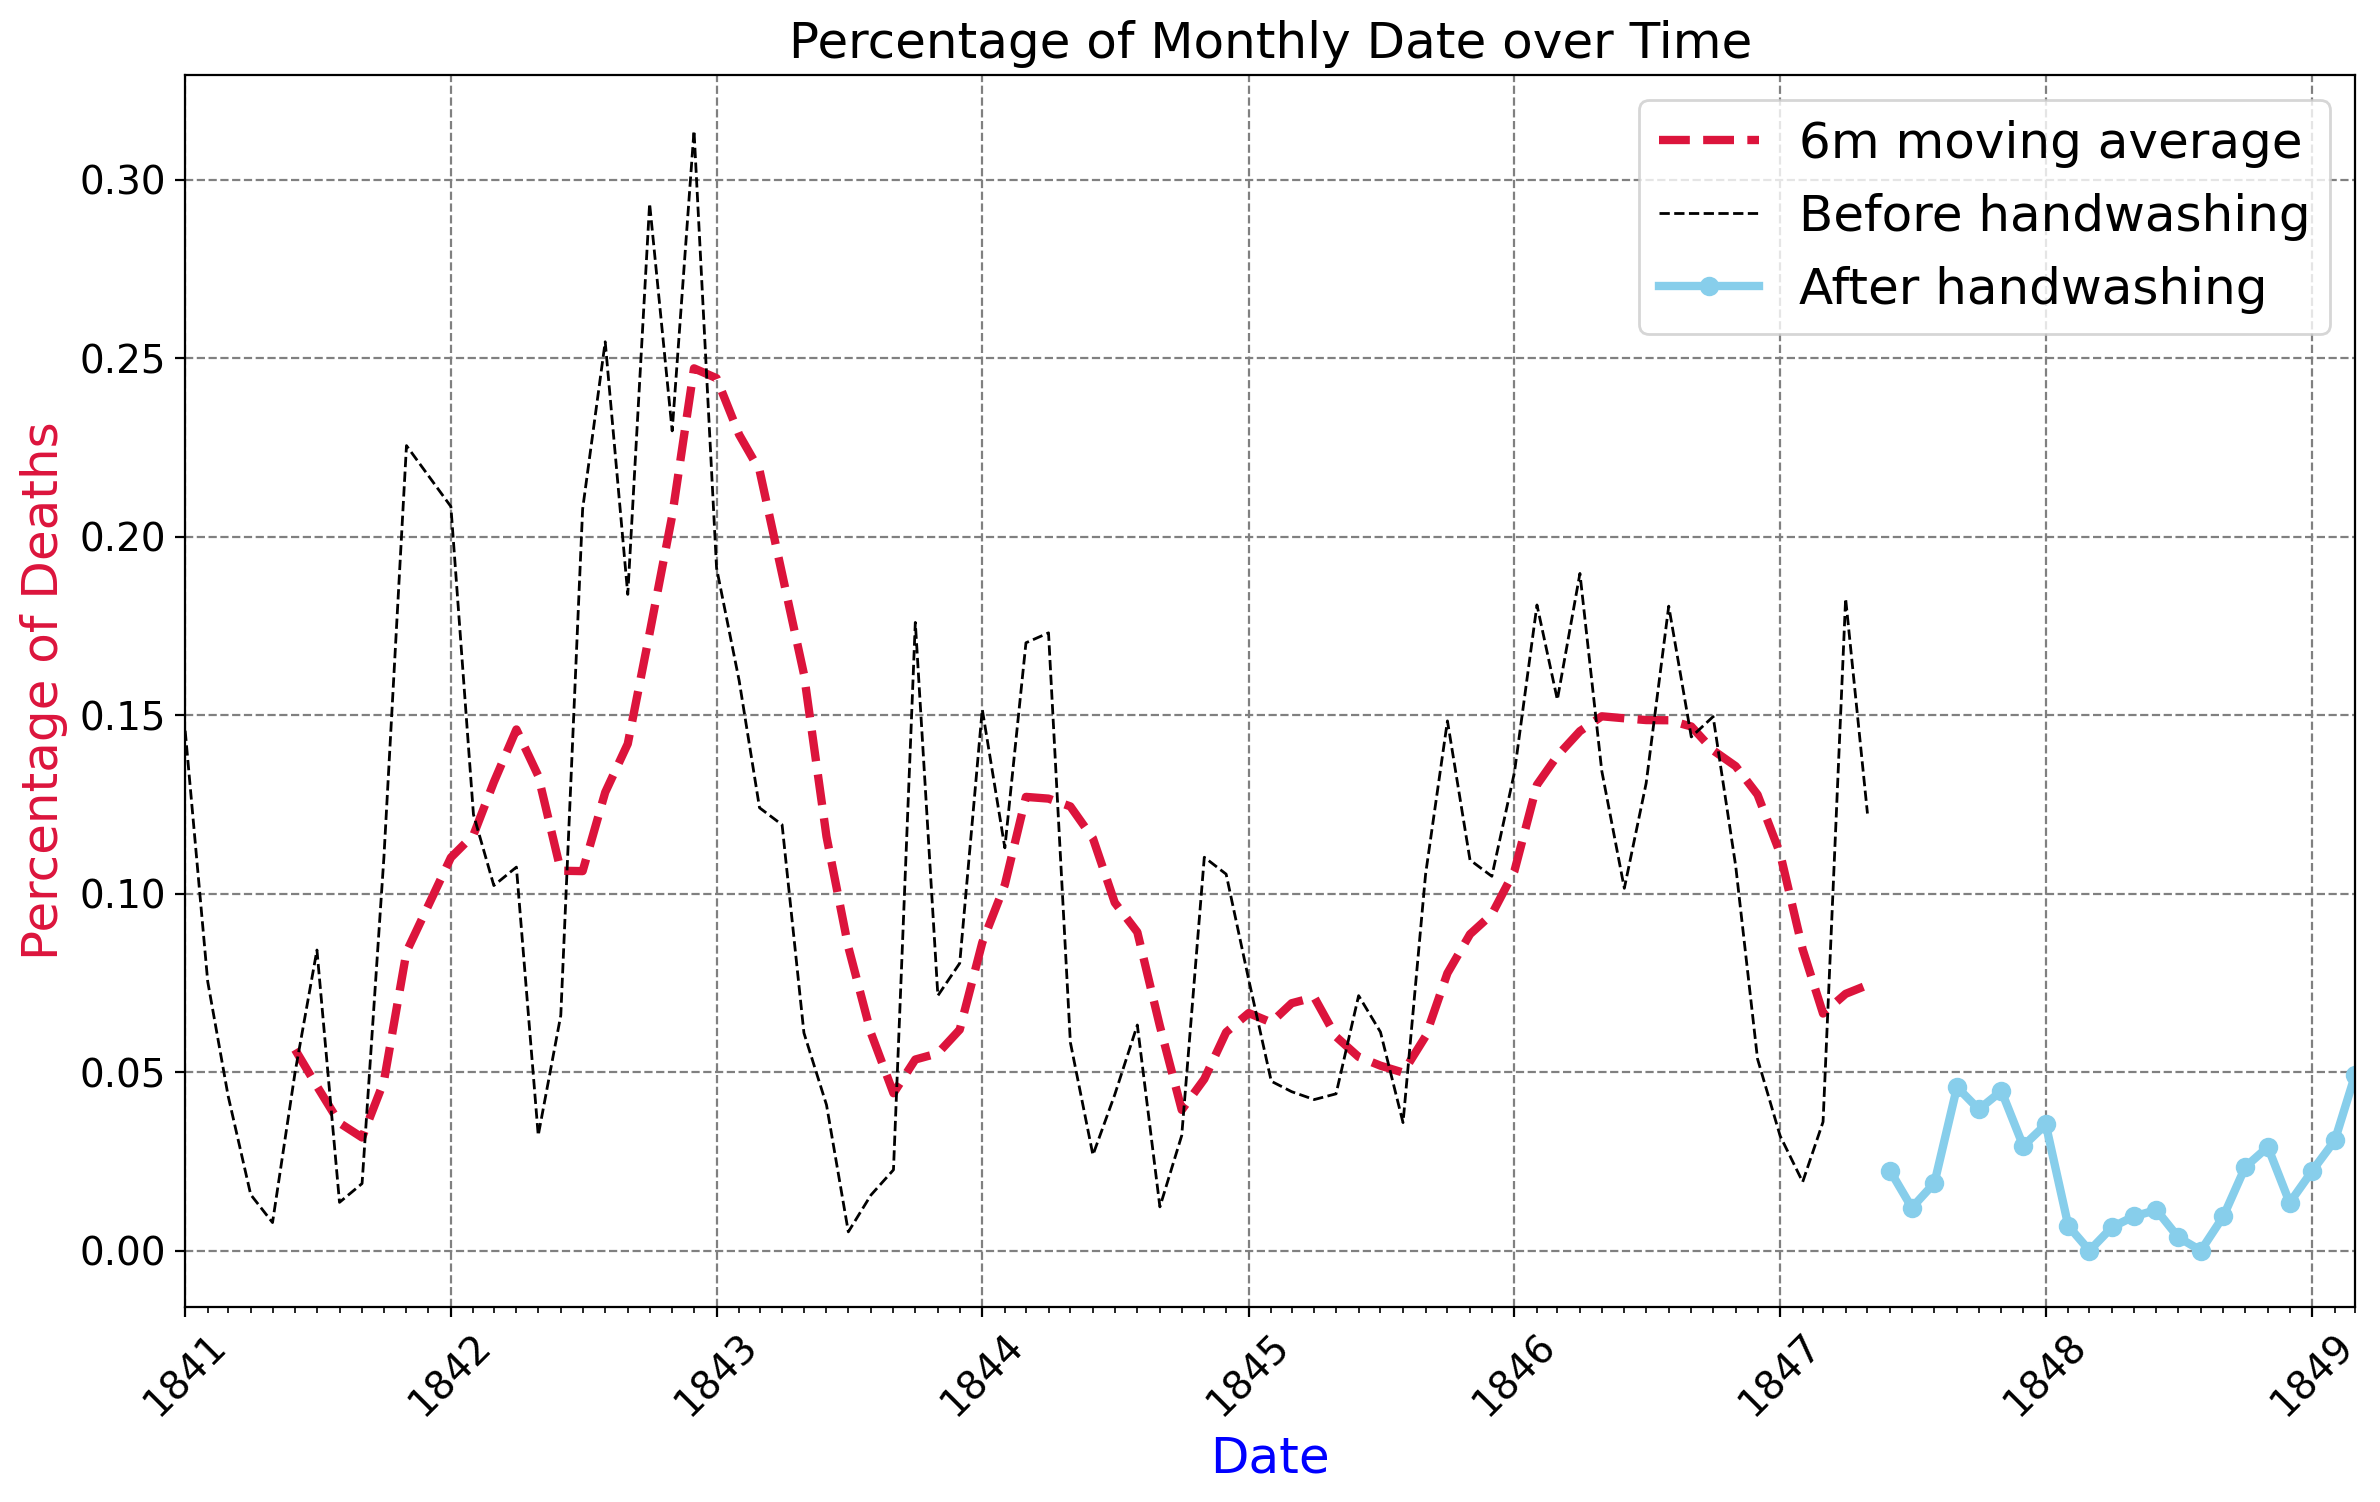

In [28]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Date over Time', fontsize =18)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14, rotation= 45)

plt.ylabel('Percentage of Deaths', color = 'crimson', fontsize =18)
plt.xlabel('Date', color='blue', fontsize = 18)

ax=plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])

plt.grid(color='grey', linestyle='--')

moving_avg, = plt.plot(
    rolling_df.index,
    rolling_df.pct_death,
    color='crimson',
    linewidth=3,
    linestyle = '--',
    label = '6m moving average'
)

before_washing, = plt.plot(
    df_before_hw.date,
    df_before_hw.pct_death,
    color='black',
    linewidth=1,
    linestyle = '--',
    label = 'Before handwashing'
)

after_washing, = plt.plot(
    df_after_hw.date,
    df_after_hw.pct_death,
    color='skyblue',
    linewidth=3,
    marker = 'o',
    label = 'After handwashing'
)

plt.legend(handles = [moving_avg, before_washing, after_washing], fontsize = 18)

plt.show()

**Insight:** here is a quick visualization of how effective the handwashing initiative was.

### Statistics - Calculate the Difference in the Average Monthly Death Rate


In [29]:
before_handwashing = (df_before_hw.deaths.sum()/df_before_hw.births.sum())*100
after_handwashing = (df_after_hw.deaths.sum()/df_after_hw.births.sum())*100
overall_deathrate = (df_monthly.deaths.sum()/df_monthly.births.sum())*100
diff_before_after = before_handwashing - after_handwashing
diff_after_overall = after_handwashing - overall_deathrate
ratio = before_handwashing/after_handwashing

print(f"Before the handwashing madatory the death rate was {before_hw_rate:.4}%.")
print(f"After the handwashing madatory the death rate was {after_hw_rate:.3}%.")
print(f"The chance of dying in childbirth was reduced by {diff_before_after:.2}%")
print(f"In terms of the average for all the 1840s the difference was {diff_after_overall:.2}%")
print(f"The chances of dying is {ratio:.2} times lower compare to before.")

Before the handwashing madatory the death rate was 10.53%.
After the handwashing madatory the death rate was 2.15%.
The chance of dying in childbirth was reduced by 8.4%
In terms of the average for all the 1840s the difference was -6.3%
The chances of dying is 4.9 times lower compare to before.


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing


In [30]:
df_monthly['washing_hands'] = np.where(df_monthly.date > handwashing_start, "Yes", "No")

In [38]:
df_monthly


,date,births,deaths,pct_death,washing_hands
0,1841-01-01,254,37,0.15,No
1,1841-02-01,239,18,0.08,No
2,1841-03-01,277,12,0.04,No
3,1841-04-01,255,4,0.02,No
4,1841-05-01,255,2,0.01,No
...,...,...,...,...,...
93,1848-11-01,310,9,0.03,Yes
94,1848-12-01,373,5,0.01,Yes
95,1849-01-01,403,9,0.02,Yes
96,1849-02-01,389,12,0.03,Yes


<AxesSubplot:title={'center':'How have the stats changed with handwashing?'}, xlabel='washing_hands', ylabel='pct_death'>

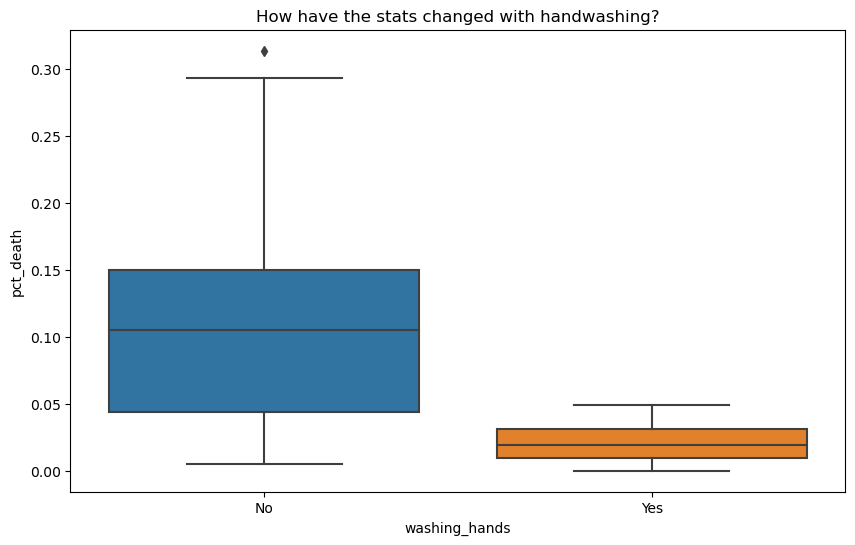

In [44]:
plt.figure(figsize=(10,6), dpi=100)
plt.title("How have the stats changed with handwashing?")
sns.boxplot(
    x = df_monthly.washing_hands,
    y = df_monthly.pct_death
)

**Insight:** This boxplot offers a distinct perspective on how handwashing influences the death rate of women in the 1840s. Upon comparing the two boxplots, it becomes evident that the first one depicts a substantial spike in the death rate, exceeding 30%, occurring in 1842. This boxplot features a large body and long whiskers, indicating significant fluctuations in the death rate of women in the absence of handwashing. In contrast, after the introduction of handwashing, the second boxplot is noticeably smaller with shorter whiskers. This boxplot suggests that with the implementation of handwashing, the averages, maximums, and minimums decrease significantly, resulting in greater overall stability.

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution


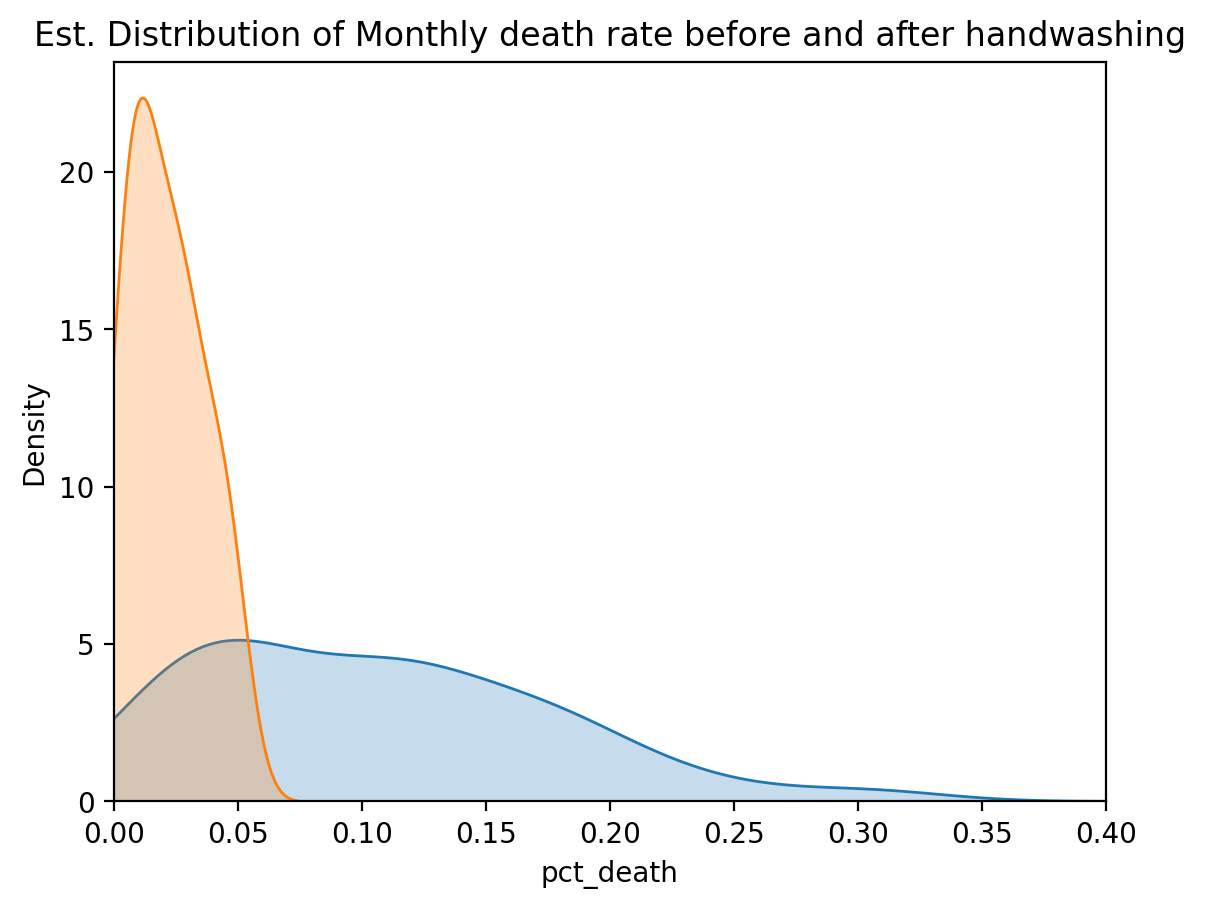

In [33]:
plt.figure(dpi=200)

sns.kdeplot(df_before_hw.pct_death, shade = True)
sns.kdeplot(df_after_hw.pct_death, shade = True)
plt.title("Est. Distribution of Monthly death rate before and after handwashing")
plt.xlim(0,0.4)
plt.show()

**Insight:** According to the graph, it is clear that handwashing iniative is indeed extremely effective. The distribution of the death rate is more skewed to the right compared to the flatter distribution observed in the absence of handwashing. This further reinforces our argument in favor of handwashing.

### Use a T-Test to Show Statistical Significance

Lastly, we want to statistical confirm that the 8.4% decrease in the overall mortality rate isn't just happen purely by chance but actually statistically significant (meaning that the difference was had by the introduction of handwashing).



In [34]:
import scipy.stats as stats

In [35]:
t_stat, p_value = stats.ttest_ind(
    a = df_before_hw.pct_death,
    b = df_after_hw.pct_death
)

print(f"p-value is {p_value:.10f}.")
print(f"t-statistic is {t_stat:.4}.")

p-value is 0.0000002985.
t-statistic is 5.512.


**Insight:** With a p-value of 0.0000002985, or 0.00002985%, we can confidently state that we are 99% certain that the difference brought about by introducing handwashing is not merely a random occurrence but is statistically significant.